# <font color='#eb3483'> Import Data </font>

In [190]:
#from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import pie, show
from numpy import array

#ignore warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [58]:
sns.__version__

'0.11.2'

In [59]:
sns.set()

In [60]:
df = pd.read_csv("compas.csv", skip_blank_lines = True)
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,8/14/13,Male,4/18/47,69,Greater than 45,Other,...,1,Low,8/14/13,7/7/14,7/14/14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,1/27/13,Male,1/22/82,34,25 - 45,African-American,...,1,Low,1/27/13,1/26/13,2/5/13,0,9,159,1,1
2,4,ed philo,ed,philo,4/14/13,Male,5/14/91,24,Less than 25,African-American,...,3,Low,4/14/13,6/16/13,6/16/13,4,0,63,0,1
3,5,marcu brown,marcu,brown,1/13/13,Male,1/21/93,23,Less than 25,African-American,...,6,Medium,1/13/13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,3/26/13,Male,1/22/73,43,25 - 45,Other,...,1,Low,3/26/13,NaN,NaN,2,0,1102,0,0


In [61]:
df.shape

(7214, 53)

In [62]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [63]:
duplicate = df[df.duplicated()]
duplicate.shape

(0, 53)

# <font color='#eb3483'> Data Analysis </font>

Questions: Does the algorithm lead to biased results?

Clean data after break them down according to topics for convienice, when cleaning, check for:
1. missing/useless values
2. cardinality (how many repetitive values)
3. outliners

Steps for analysis:
1. pick out columns, clean & prepare data, raname columns
2. run analysis
3. make graphs

## <font color='#eb3483'> 1. Are there any racial differences in decile score (for the first/current arrest)? </font>

### <font color='#eb3483'> Prep </font>

In [64]:
df_q1 = df[['id', 'race', 'decile_score', 'priors_count', 'c_charge_degree']]
df_q1.head()

,id,race,decile_score,priors_count,c_charge_degree
0,1,Other,1,0,F
1,3,African-American,3,0,F
2,4,African-American,4,4,F
3,5,African-American,8,1,F
4,6,Other,1,2,F


In [65]:
df_q1.rename(columns = {'decile_score':'score', 'priors_count' : 'priors', 'c_charge_degree' : 'charge_degree'}, inplace = True)
df_q1.head()

,id,race,score,priors,charge_degree
0,1,Other,1,0,F
1,3,African-American,3,0,F
2,4,African-American,4,4,F
3,5,African-American,8,1,F
4,6,Other,1,2,F


In [66]:
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             7214 non-null   int64 
 1   race           7214 non-null   object
 2   score          7214 non-null   int64 
 3   priors         7214 non-null   int64 
 4   charge_degree  7214 non-null   object
dtypes: int64(3), object(2)
memory usage: 281.9+ KB


In [67]:
df_q1.race.unique()

array(['Other', 'African-American', 'Caucasian', 'Hispanic',
       'Native American', 'Asian'], dtype=object)

In [68]:
keep = ['Other', 'Hispanic',
       'Native American', 'Asian']

In [69]:
#only keep Caucasian and Afican American
df_q1 = df_q1[~df_q1['race'].isin(keep)]
df_q1.head()

,id,race,score,priors,charge_degree
1,3,African-American,3,0,F
2,4,African-American,4,4,F
3,5,African-American,8,1,F
6,8,Caucasian,6,14,F
8,10,Caucasian,1,0,M


In [70]:
df_q1.shape

(6150, 5)

### <font color='#eb3483'> Analysis </font>

In [71]:
mean_by_race = df_q1[['race', 'score']].groupby("race", as_index=False).mean()
mean_by_race

,race,score
0,African-American,5.368777
1,Caucasian,3.735126


This shows that Arifan Americans tend to recieve a higher score.

We could argue this is because their criminal record. So - how about when both group of people have the same number of priors and the same degree of charge?

In [153]:
df_q1['priors'].unique()

array([ 0,  4,  1, 14,  3,  7,  6,  5, 13,  8,  9, 21,  2, 20, 15, 10, 12,
       28, 19, 11, 22, 23, 25, 24, 36, 18, 16, 33, 17, 30, 27, 38, 26, 37,
       29, 35, 31])

In [73]:
pd.crosstab(df_q1.score, [df_q1.priors, df_q1.race], rownames=['score'], colnames=['priors', 'race'])

priors               0                          1                          2   \
race   African-American Caucasian African-American Caucasian African-American   
score                                                                           
1                   179       347              111       170               33   
2                   130       142               99        86               47   
3                   123        89               66        65               46   
4                   114        79               82        51               47   
5                    88        58               73        46               44   
6                    50        45               68        35               41   
7                    71        30               52        20               45   
8                    55        23               35        17               25   
9                    35        17               41         7               42   
10                   27         8               35         7               22   

priors                         3                          4             ...  \
race   Caucasian African-American Caucasian African-American Caucasian  ...   
score                                                                   ...   
1             80               30        37               20        18  ...   
2             53               45        24               26        18  ...   
3             47               25        29               22        13  ...   
4             39               25        35               23        20  ...   
5             35               34        28               30        15  ...   
6             24               44        12               21        14  ...   
7             13               30        16               24         9  ...   
8             10               22        13               31        12  ...   
9             14               23         5               19         5  ...   
10             5               22         5               15         4  ...   

priors               29               30                         31  \
race   African-American African-American Caucasian African-American   
score                                                                 
1                     0                0         0                0   
2                     0                0         0                0   
3                     0                0         0                0   
4                     0                1         0                0   
5                     0                0         0                0   
6                     2                0         1                1   
7                     0                0         0                0   
8                     2                0         0                0   
9                     1                0         0                0   
10                    0                0         0                0   

priors               33                         35        36               37  \
race   African-American Caucasian African-American Caucasian African-American   
score                                                                           
1                     0         0                0         0                0   
2                     0         0                0         0                0   
3                     0         0                0         0                0   
4                     0         0                0         0                0   
5                     0         0                0         0                0   
6                     1         0                0         1                0   
7                     1         0                0         0                1   
8                     0         0                0         0                0   
9                     0         1                0         0                0   
10                    

In [89]:
pd.crosstab([df_q1.priors, df_q1.race], df_q1.score, rownames=['priors', 'race'], colnames=['score'])

score                     1    2    3    4   5   6   7   8   9   10
priors race                                                        
0      African-American  179  130  123  114  88  50  71  55  35  27
       Caucasian         347  142   89   79  58  45  30  23  17   8
1      African-American  111   99   66   82  73  68  52  35  41  35
       Caucasian         170   86   65   51  46  35  20  17   7   7
2      African-American   33   47   46   47  44  41  45  25  42  22
...                      ...  ...  ...  ...  ..  ..  ..  ..  ..  ..
33     Caucasian           0    0    0    0   0   0   0   0   1   0
35     African-American    0    0    0    0   0   0   0   0   0   1
36     Caucasian           0    0    0    0   0   1   0   0   0   0
37     African-American    0    0    0    0   0   0   1   0   0   0
38     African-American    0    0    0    0   0   0   1   1   0   0

[66 rows x 10 columns]

In [74]:
#mean_by_race = df_q1[['race', 'score']].groupby("race", as_index=False).mean()

df_q1[['score', 'race', 'charge_degree']].groupby(['race','charge_degree'], as_index=False).mean()

#df_q1.groupby(['race','priors'])['score'].mean()

,race,charge_degree,score
0,African-American,F,5.621516
1,African-American,M,4.808529
2,Caucasian,F,4.155405
3,Caucasian,M,3.096509


In [75]:
df_q1.dtypes

id                int64
race             object
score             int64
priors            int64
charge_degree    object
dtype: object

In [76]:
df_q1.race = df_q1.race.astype("category")

In [77]:
df_q1.charge_degree = df_q1.charge_degree.astype("category")

In [78]:
df_q1.dtypes

id                  int64
race             category
score               int64
priors              int64
charge_degree    category
dtype: object

In [79]:
df_q1['race_charge'] = df_q1.race.str.cat(df_q1.charge_degree)
df_q1.head()

,id,race,score,priors,charge_degree,race_charge
1,3,African-American,3,0,F,African-AmericanF
2,4,African-American,4,4,F,African-AmericanF
3,5,African-American,8,1,F,African-AmericanF
6,8,Caucasian,6,14,F,CaucasianF
8,10,Caucasian,1,0,M,CaucasianM


In [80]:
mean_by_race_charge = df_q1[['race_charge', 'score']].groupby("race_charge", as_index=False).mean()
mean_by_race_charge

,race_charge,score
0,African-AmericanF,5.621516
1,African-AmericanM,4.808529
2,CaucasianF,4.155405
3,CaucasianM,3.096509


### <font color='#eb3483'> Graphs </font>

In [81]:
df_q1.head()

,id,race,score,priors,charge_degree,race_charge
1,3,African-American,3,0,F,African-AmericanF
2,4,African-American,4,4,F,African-AmericanF
3,5,African-American,8,1,F,African-AmericanF
6,8,Caucasian,6,14,F,CaucasianF
8,10,Caucasian,1,0,M,CaucasianM


In [267]:
sns.set(style="ticks", palette="YlGnBu")
#YlGnBu
#Spectral

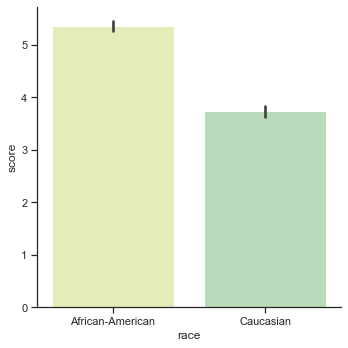

In [108]:
sns.catplot(x="race", y="score", data=df_q1, kind = "bar");

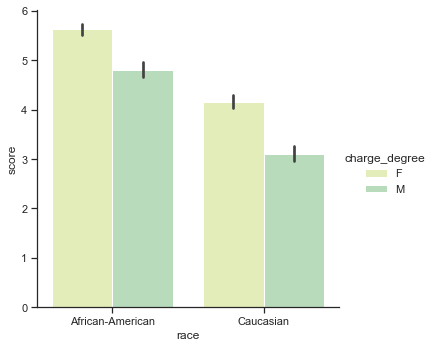

In [109]:
sns.catplot(x="race", y="score", data=df_q1, kind = "bar", hue = 'charge_degree')

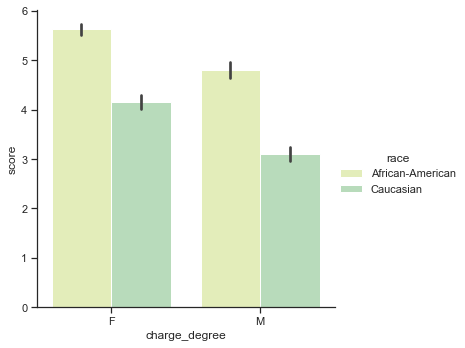

In [110]:
sns.catplot(x="charge_degree", y="score", data=df_q1, kind = "bar", hue = 'race')

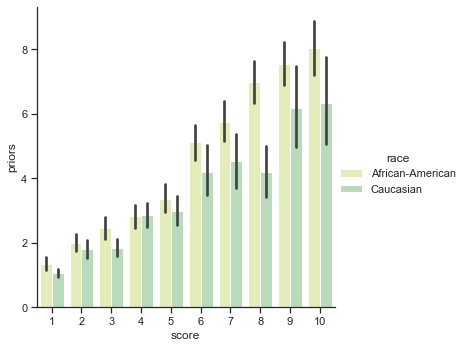

In [115]:
sns.catplot(x="score", y="priors", data=df_q1, kind = "bar", hue = 'race')

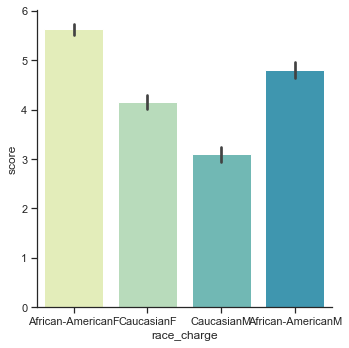

In [87]:
sns.catplot(x="race_charge", y="score", data=df_q1, kind = "bar")

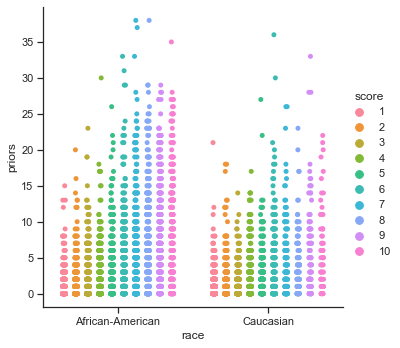

In [95]:
sns.catplot(x="race", y="priors", data=df_q1, kind = "strip", hue = "score", dodge = True)

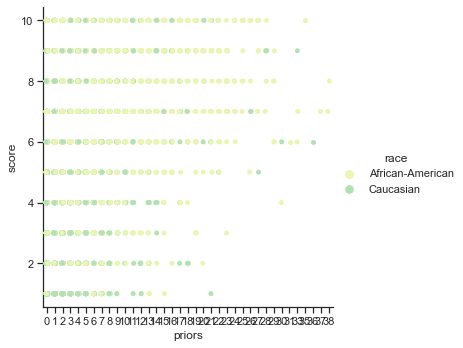

In [125]:
sns.catplot(x="priors", y="score", data=df_q1, kind = "strip", hue = "race")

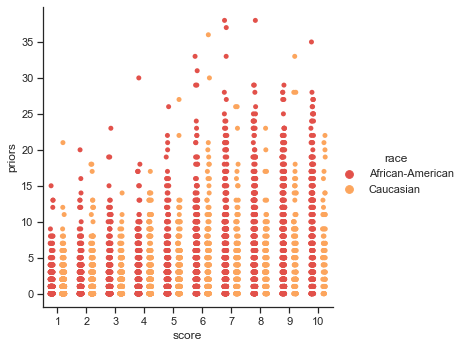

In [113]:
sns.catplot(x="score", y="priors", data=df_q1, kind = "strip", hue = "race", dodge = True)

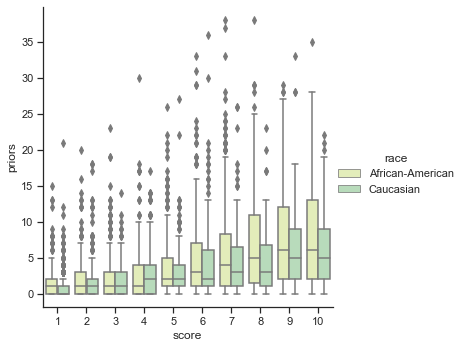

In [118]:
sns.catplot(x="score", y="priors", data=df_q1, kind = "box", hue = "race")

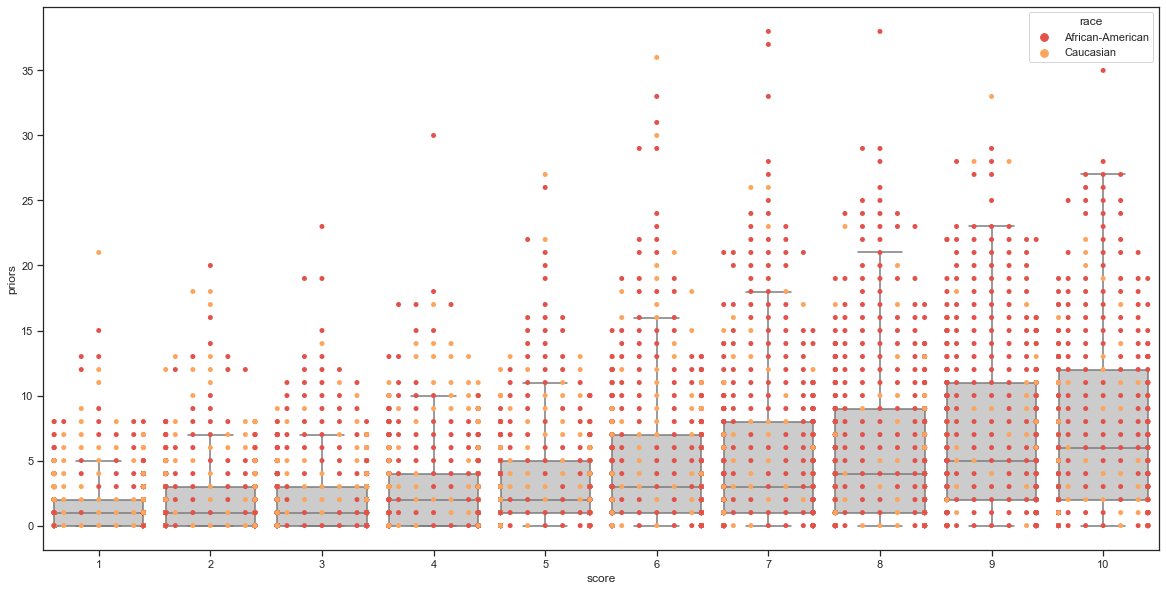

In [168]:
sns.boxplot(x="score", y="priors", data=df_q1, color=".8", showfliers=False)
sns.swarmplot(x="score", y="priors", hue="race", data=df_q1)
plt.gcf().set_size_inches(20, 10)

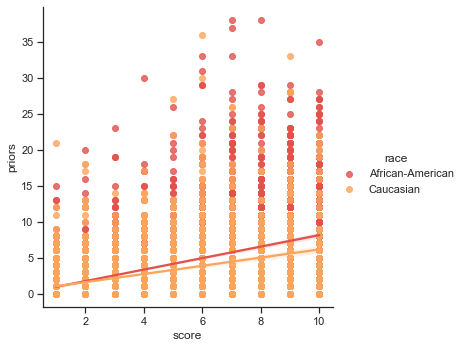

In [121]:
sns.lmplot(x="score", y="priors", data=df_q1, hue = "race")

## <font color='#eb3483'> 2. Can decile score accurately predict recidivism for both ethnicities? </font>

### <font color='#eb3483'> Prep </font>

In [131]:
df_q2 = df[['id', 'race', 'decile_score', 'is_recid']]
df_q2.head()

,id,race,decile_score,is_recid
0,1,Other,1,0
1,3,African-American,3,1
2,4,African-American,4,1
3,5,African-American,8,0
4,6,Other,1,0


In [134]:
df_q2.rename(columns = {'decile_score':'score', 'is_recid' : 'recidivism'}, inplace = True)
df_q2.head()

,id,race,score,recidivism
0,1,Other,1,0
1,3,African-American,3,1
2,4,African-American,4,1
3,5,African-American,8,0
4,6,Other,1,0


In [136]:
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7214 non-null   int64 
 1   race        7214 non-null   object
 2   score       7214 non-null   int64 
 3   recidivism  7214 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 225.6+ KB


In [138]:
df_q2 = df_q2[~df_q2['race'].isin(keep)]
df_q2.head()

,id,race,score,recidivism
1,3,African-American,3,1
2,4,African-American,4,1
3,5,African-American,8,0
6,8,Caucasian,6,1
8,10,Caucasian,1,0


In [140]:
df_q2.shape

(6150, 4)

In [141]:
df_q2.race.unique()

array(['African-American', 'Caucasian'], dtype=object)

### <font color='#eb3483'> Analysis </font>

In [149]:
pd.crosstab(df_q2.recidivism, df_q2.score)

score,1,2,3,4,5,6,7,8,9,10
recidivism,,,,,,,,,,
0,825,493,356,355,300,235,196,127,131,71
1,254,261,263,315,306,343,347,346,347,279


In [196]:
pie_chart_1 = pd.crosstab(df_q2.recidivism, df_q2.score, normalize="index")
pie_chart_1

score,1,2,3,4,5,6,7,8,9,10
recidivism,,,,,,,,,,
0,0.267077,0.159599,0.115248,0.114924,0.097119,0.076076,0.063451,0.041114,0.042409,0.022985
1,0.082979,0.085266,0.085920,0.102908,0.099967,0.112055,0.113362,0.113035,0.113362,0.091147


In [210]:
percentage_race_rac = pd.crosstab([df_q2.race, df_q2.recidivism,], df_q2.score)
percentage_race_rac
#1-4 62% did not recidivate for African American
#1-4 68.6% did not recidivate for Caucasian
#8-10 75.2% did recidivate for Afican American
#8-10 72.8% did recidivate for Afican American


score                         1    2    3    4    5    6    7    8    9    10
race             recidivism                                                  
African-American 0           298  257  182  194  174  155  146   99  102   53
                 1           100  136  164  191  191  229  254  260  278  233
Caucasian        0           527  236  174  161  126   80   50   28   29   18
                 1           154  125   99  124  115  114   93   86   69   46

### <font color='#eb3483'> Graph </font>

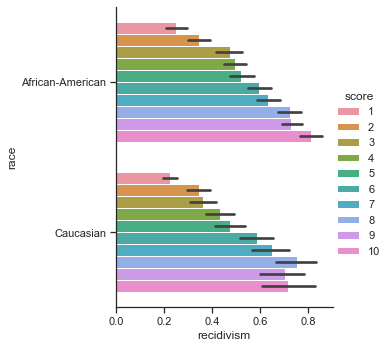

In [208]:
sns.catplot(x="recidivism", y="race", data=df_q2, hue = "score", kind = "bar")

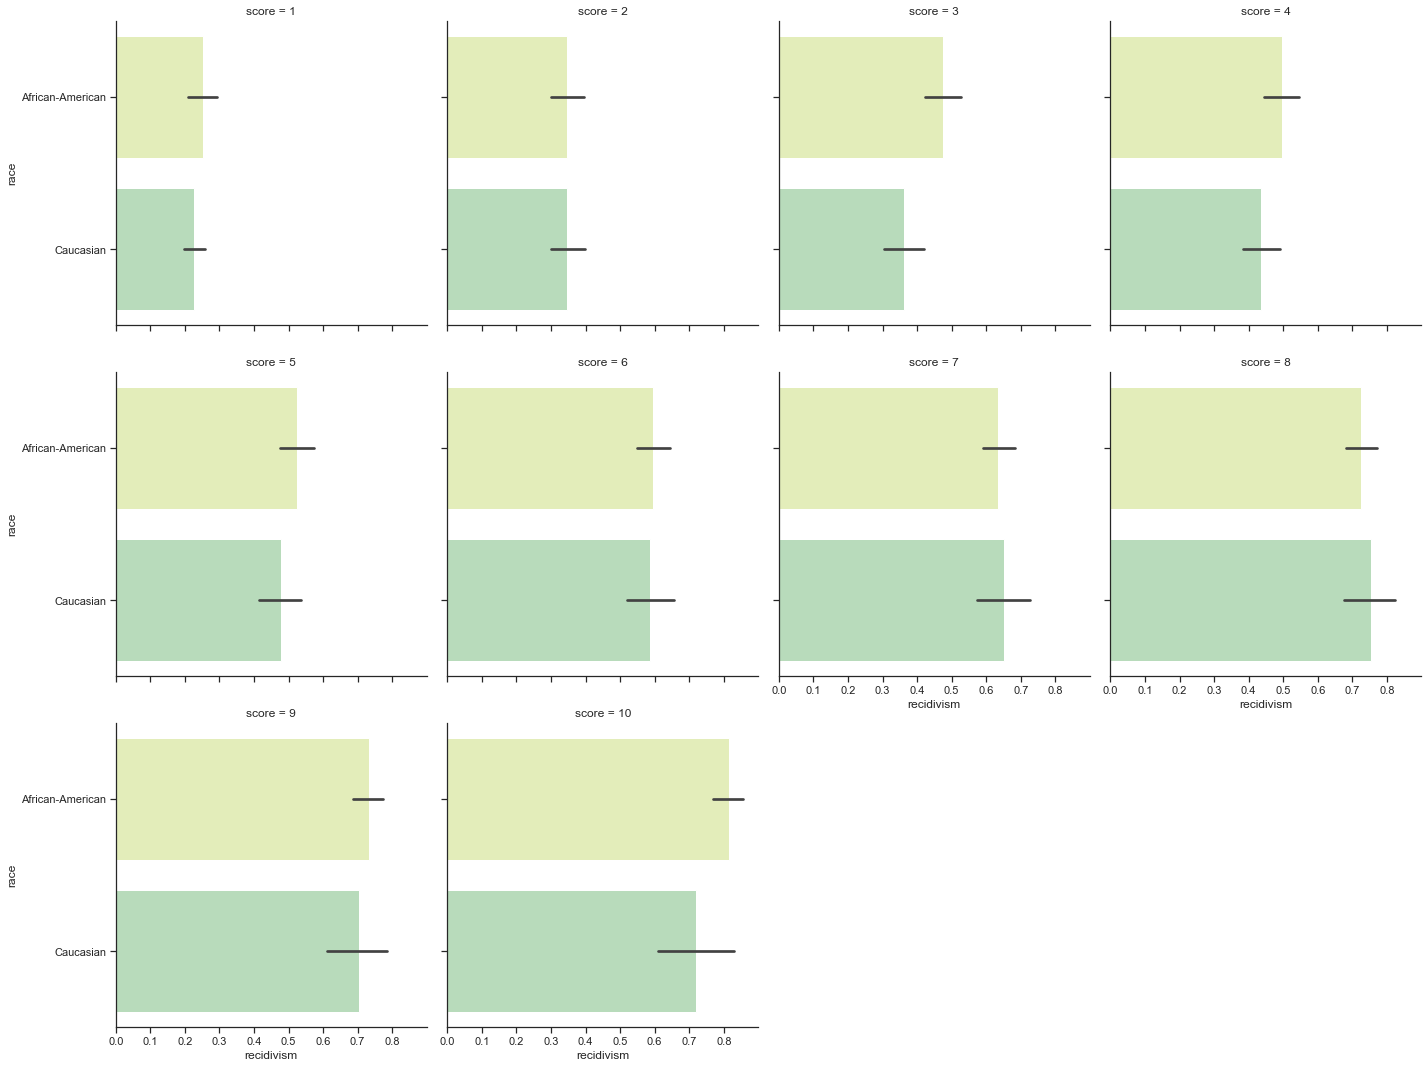

In [274]:
sns.catplot(x="recidivism", y="race", data=df_q2, col = "score", col_wrap=4, kind = "bar")

In [206]:
df_q2.head()

,id,race,score,recidivism
1,3,African-American,3,1
2,4,African-American,4,1
3,5,African-American,8,0
6,8,Caucasian,6,1
8,10,Caucasian,1,0


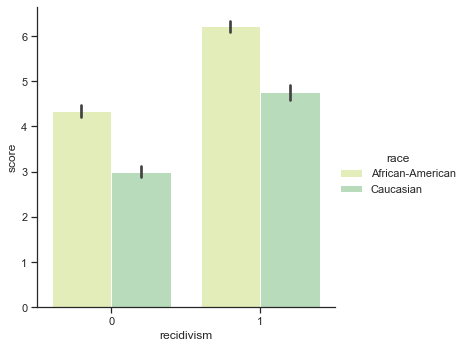

In [207]:
sns.catplot(x="recidivism", y="score", data=df_q2, hue = "race", kind = "bar")

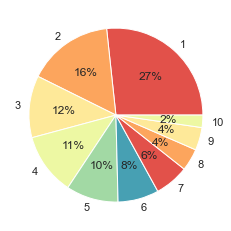

In [201]:
dataset_1 = array([0.267077, 0.159599, 0.115248, 0.114924, 0.097119, 0.076076, 0.063451, 0.041114, 0.042409, 0.022985])
mylabels_1 = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
pie(dataset_1, labels = mylabels_1, autopct='%1.0f%%')
show() 

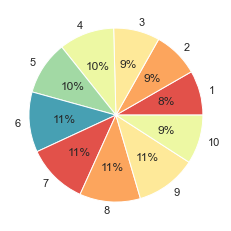

In [202]:
dataset_2 = array([0.082979, 0.085266, 0.085920, 0.102908, 0.099967, 0.112055, 0.113362, 0.113035, 0.113362, 0.091147])
mylabels_2 = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
pie(dataset_2, labels = mylabels_2,autopct='%1.0f%%' )
show() 

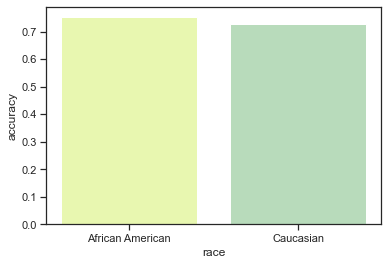

In [258]:
#1-4 62% did not recidivate for African American
#1-4 68.6% did not recidivate for Caucasian
#8-10 75.2% did recidivate for Afican American
#8-10 72.8% did recidivate for Caucasian
accuracy = [0.620, 0.686, 0.752, 0.728]
race = ["African American", "Caucasian", "African American", "Caucasian"]
plt.bar(race, accuracy, color=['#E8F7B0', '#B8DBBB'])
plt.xlabel('race')
plt.ylabel('accuracy')
plt.show()

In [261]:
data = [['African American', 0.620], ['Caucasian', 0.686], ['African American', 0.752], ['Caucasian', 0.728]]
  
df_q2_accuracy = pd.DataFrame(data, columns=['race', 'accuracy'])

df_q2_accuracy

,race,accuracy
0,African American,0.620
1,Caucasian,0.686
2,African American,0.752
3,Caucasian,0.728


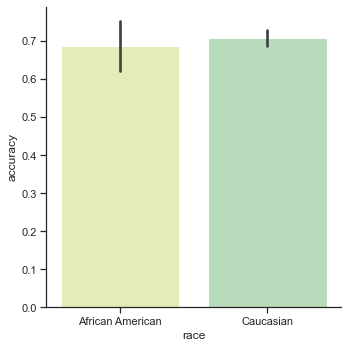

In [268]:
sns.catplot(x="race", y="accuracy", data=df_q2_accuracy, kind = "bar");

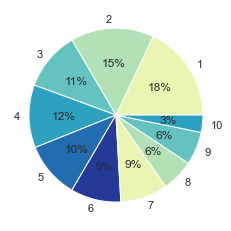

In [270]:
dataset_3 = array([298,257,182,194,174,155,146, 99, 102,53])
mylabels_3 = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
pie(dataset_3, labels = mylabels_3, autopct='%1.0f%%')
show() 

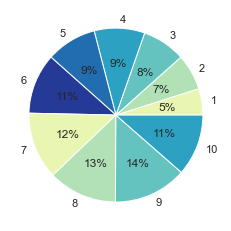

In [271]:
dataset_4 = array([100, 136, 164, 191, 191, 229, 254, 260, 278, 233])
mylabels_4 = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
pie(dataset_4, labels = mylabels_4, autopct='%1.0f%%')
show() 

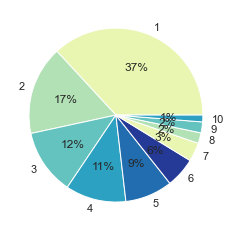

In [272]:
dataset_5 = array([527,236,174,161,126,80,50,28,29,18])
mylabels_5 = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
pie(dataset_5, labels = mylabels_5, autopct='%1.0f%%')
show() 

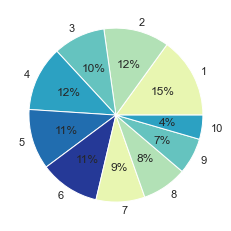

In [273]:
dataset_6 = array([154,125,99,124,115,114,93,86,69,46])
mylabels_6 = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
pie(dataset_6, labels = mylabels_6, autopct='%1.0f%%')
show() 